In [3]:
import os
os.getcwd()

'c:\\Users\\GFCON\\Documents\\Project\\BidPrice\\jungiNet\\analysis'

In [8]:
import glob
csv_paths = glob.glob("../output/*.csv")
csv_dir_path = "../output"
csv_paths = glob.glob(os.path.join(csv_dir_path, "*.csv"))

In [26]:
import pandas as pd
df = pd.read_csv(csv_paths[2])
df.columns

In [51]:
import matplotlib.pyplot as plt
import os


# Plot first 10 CSV files
for i in range(10):
    if i < len(csv_paths):

        try:
            df = pd.read_csv(csv_paths[i])
            # Get filename without extension for saving
                    # Create output directory if it doesn't exist

            filename = os.path.splitext(os.path.basename(csv_paths[i]))[0]
            output_dir = f"output_histogram/{filename}"
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            # Extract numeric values from the string format
            df['기초대비사정률'] = df['기초대비 사정률(%)  A'].str.extract(r'(-?\d+\.\d+)')[0].astype(float)
            
            # Plot histograms with different bin sizes
            bins = [50, 100, 200, 500]
            range_min = -2.5
            range_max = 2.5
            for j, num_bins in enumerate(bins):
                # Create figure for this CSV
                fig, ax = plt.subplots(figsize=(10, 6))
                # Create figure for this CSV
                # Calculate scaled data
                scaled_data = df['기초대비사정률']
                
                if j == 0:  # Only plot the first histogram normally
                    ax.hist(scaled_data, bins=num_bins, alpha=0.3, 
                            label=f'scale={num_bins/100}x (bins={num_bins})',
                            range=(range_min, range_max))
                else:  # Stack subsequent histograms
                    ax.hist(scaled_data, bins=num_bins, alpha=0.3, 
                            label=f'scale={num_bins/100}x (bins={num_bins})',
                            range=(range_min, range_max ))
                        
                ax.set_xlim(range_min, range_max)
                ax.set_title(f'Distribution for {filename}')
                ax.set_xlabel('기초대비사정률')
                ax.set_ylabel('Frequency')
                ax.legend()
                
                plt.tight_layout()
                
                # Save figure
                save_path = os.path.join(output_dir, f'{num_bins}_histogram.png')
                plt.savefig(save_path)
                plt.close()
            
        except Exception as e:
            print(f"Error processing file {i+1}: {e}")

C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2282360190.py:47: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2282360190.py:47: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2282360190.py:47: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2282360190.py:47: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2282360190.py:47: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2282360190.py:47: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from 

Error processing file 9: '기초대비 사정률(%)  A'
Error processing file 10: '기초대비 사정률(%)  A'


In [53]:
# delete all files and directories in output_histogram
for file in os.listdir(output_dir):
    os.remove(os.path.join(output_dir, file))
os.rmdir(output_dir)



FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'output_histogram/20241144450-00'

C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2056573957.py:16: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2056573957.py:16: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2056573957.py:16: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2056573957.py:16: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2056573957.py:16: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GFCON\AppData\Local\Temp\ipykernel_19340\2056573957.py:16: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from 

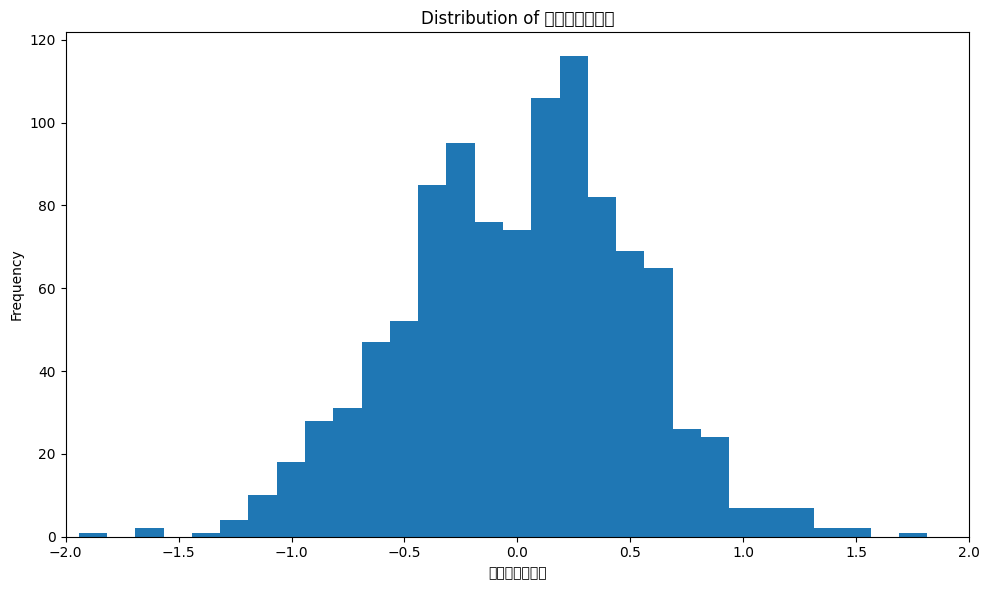

In [31]:
# Create a single figure and axis
plt.figure(figsize=(10, 6))

df = pd.read_csv(csv_paths[2])

# Extract numeric values from the string format
df['기초대비사정률'] = df['기초대비 사정률(%)  A'].str.extract(r'(-?\d+\.\d+)')[0].astype(float)

# Plot single histogram
plt.hist(df['기초대비사정률'], bins=100)
plt.xlim(-2, 2)
plt.title('Distribution of 기초대비사정률')
plt.xlabel('기초대비사정률')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [34]:
print(min(df['기초대비사정률']))
print(max(df['기초대비사정률']))


-5.6981
6.82259
